## Task-2: Group customer of a retail store based on their purchase history.
> Description: Create a K-Means clustering algorithm to group customer of a retail store based on their purchase history.

### Collecting & Unzipping data

In [1]:
import zipfile
data=zipfile.ZipFile('archive.zip')
data.extractall()
data.close()

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### 1. K-Means Clustering to cluster customer data

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.drop(columns=['CustomerID'],inplace=True)

In [6]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [7]:
# selecting the features
features=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Standardize the data
sc=StandardScaler()
scaled_features=sc.fit_transform(features)

In [9]:
# Implementing Elbow method to determine the best cluster number for the given data
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_features)
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared distance')

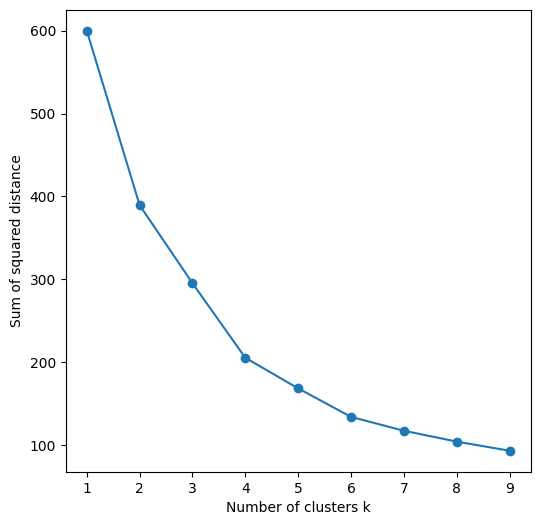

In [10]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')

#### Creating the model

In [11]:
model = KMeans(n_clusters=5) #
model.fit(scaled_features)
labels = model.labels_

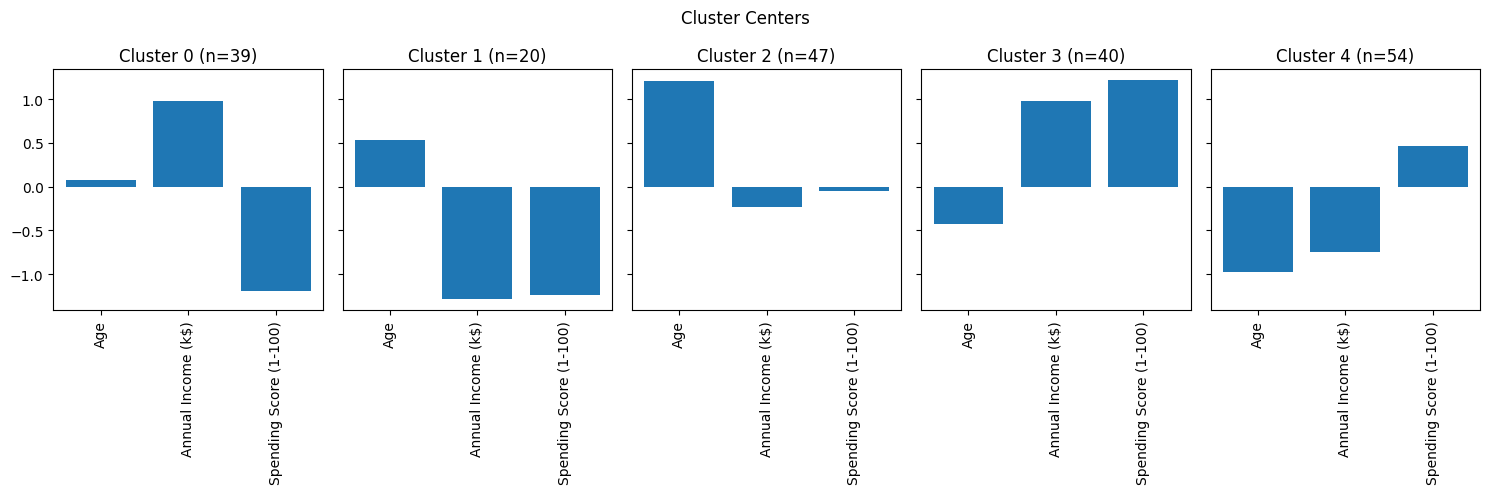

In [12]:
# Get the cluster centers
centers = model.cluster_centers_

# Count the number of samples in each cluster
counts = np.bincount(model.labels_)

# Create a figure and axes with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(centers), figsize=(15, 5), sharey=True)
fig.suptitle('Cluster Centers')

# Create a bar graph for each cluster center
for i, center in enumerate(centers):
    axes[i].bar(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], center)
    axes[i].set_title(f'Cluster {i} (n={counts[i]})')
    plt.sca(axes[i])
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

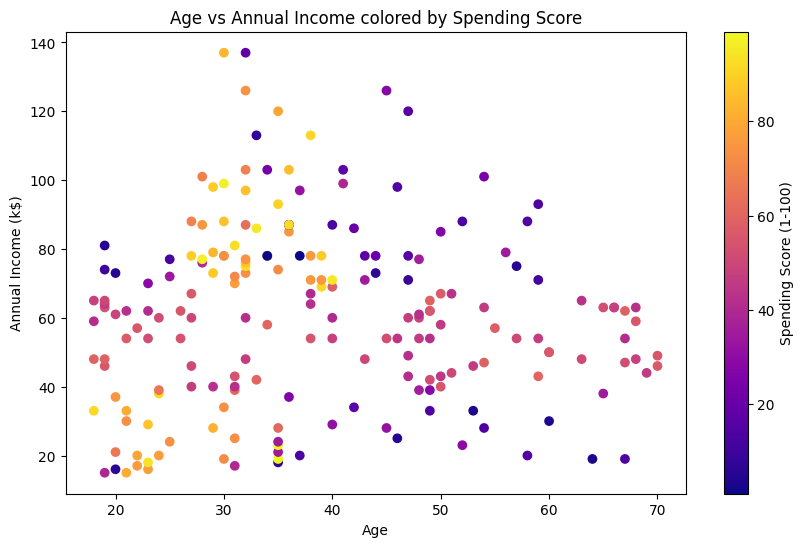

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=data['Spending Score (1-100)'], cmap='plasma')
plt.colorbar(label='Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income colored by Spending Score')
plt.show()

### Analysis of clustering

In the first cluster, the average age is significantly higher than the overall average. The corresponding average annual income and spending score are very close to the overall average. In the second cluster, the average age is below the average, but the annual income and spending score are the highest among all the clusters. In the 3rd cluster, the age is average, the annual income is quite high, but the spending score is very low. In the 4th cluster, the age is above the average, but together, the annual income and spending score are the lowest of all the clusters. In the last cluster, the average age is significantly below the average, and so is the annual income, but the spending score is above the average. 

Cluster 1: This cluster represents customers who are significantly older than average, with their annual income and spending score close to the average. This could represent a group of middle-aged to senior customers who have stable income and moderate spending habits. Advertisements might not be the most effective on this group. 

Cluster 2: Customers in this cluster are younger than average, but they have the highest annual income and spending score among all clusters. This group could represent young professionals or entrepreneurs who have high earning and spending power. They could be the primary target for marketing high-end products or luxury goods.

Cluster 3: This cluster includes customers of average age with high annual income but very low spending score. These could be high earners who are also high savers, not spending much despite their high income. They might be the target audience for quality-of-life products. 

Cluster 4: Customers in this cluster are slightly older than average, with the lowest annual income and spending score among all clusters. This group might represent retirees or people in lower-income brackets. They could be targeted for discounted or value-for-money products.

Cluster 5: This cluster consists of fairly young customers with below-average annual income but above-average spending score. These could be students / teenagers, from wealthier backgrounds. Lifestyle and fashion products might suit this group. 